## Cumulative walltime/cputime per month

Evaluate walltime and cputime accumulated each month since the beginning of the current year.

In [1]:
import helpers as h
import pandas as pd

influx_url = 'http://localhost:8086/write?db=alice'

Choose a month and year:

In [2]:
month = 9
year = 2021

### Walltime:

In [3]:
metric = "jobResUsageSum_time_run"

# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
wallt_monalisa = {}
wallt_egi = {}
wallt_ratio = {}
for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    wallt_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumelap/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'walltime')
    print(values_egi[m])
    wallt_egi[m] = h.remap_egi(values_egi[m])
    wallt_ratio[m] =dict((k, (1.0 - float(wallt_monalisa[m][k]) / float(wallt_egi[m][k])) * 100.) for k in wallt_monalisa[m])
    #print wallt_ratio[m]
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'walltime', 'monalisa', wallt_monalisa[m])
    h.write_influx(influx_url, m, year, 'walltime', 'egi', wallt_egi[m])
    h.write_influx(influx_url, m, year, 'walltime', 'ratio', wallt_ratio[m])

dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
{'INFN-BARI': 1883161, 'INFN-CATANIA': 985099, 'INFN-LNL-2': 1652781, 'INFN-T1': 4106543, 'INFN-TORINO': 1627838, 'INFN-TRIESTE': 139865, 'TRIGRID-INFN-CATANIA': 65183}
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
{'INFN-BARI': 1897918, 'INFN-CATANIA': 1031022, 'INFN-LNL-2': 1432607, 'INFN-T1': 4155957, 'INFN-TORINO': 1043498, 'INFN-TRIESTE': 122042, 'TRIGRID-INFN-CATANIA': 60643}
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
{'INFN-BARI': 2477781, 'INFN-CATANIA': 1309914, 'INFN-LNL-2': 1430564, 'INFN-T1': 4938055, 'INFN-TORINO': 1030781, 'INFN-TRIESTE': 145629, 'TRIGRID-INFN-CATANIA': 60093}
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
{'INFN-BARI

In [4]:
df_ratio = pd.DataFrame.from_dict(wallt_ratio, dtype=float, orient='index')    
print(df_ratio)

        CNAF      BARI   CATANIA   LEGNARO        TORINO       TRIESTE
1   1.230719  0.600851 -2.356920  4.009001  3.035437e+00  2.882065e+00
2   0.219468  4.085582 -1.373686  3.477367  3.189867e+01  3.907671e+00
3   2.399366 -1.014900 -1.343218  2.679363  1.332194e+00  6.175281e+00
4  -2.023022  1.402427  1.183451  1.061965 -3.222919e+00  1.633153e+00
5  -3.238507  3.645317  2.630957  3.051012  2.397004e+00  9.336888e+00
6 -17.281684  4.231416  2.946482 -0.453654 -3.409983e+01  3.227531e+00
7  -8.827706  1.493406 -9.501181  2.013130 -4.323860e+07 -1.850290e+07
8 -28.929657  2.599888  3.211710  1.522168 -1.384061e+08 -2.921700e+07
9 -19.054335  3.169578  3.137377  2.709024 -1.507105e+08 -2.918560e+07


In [5]:
df_ratio = df_ratio.drop(['CNAF','TRIESTE'], axis=1)

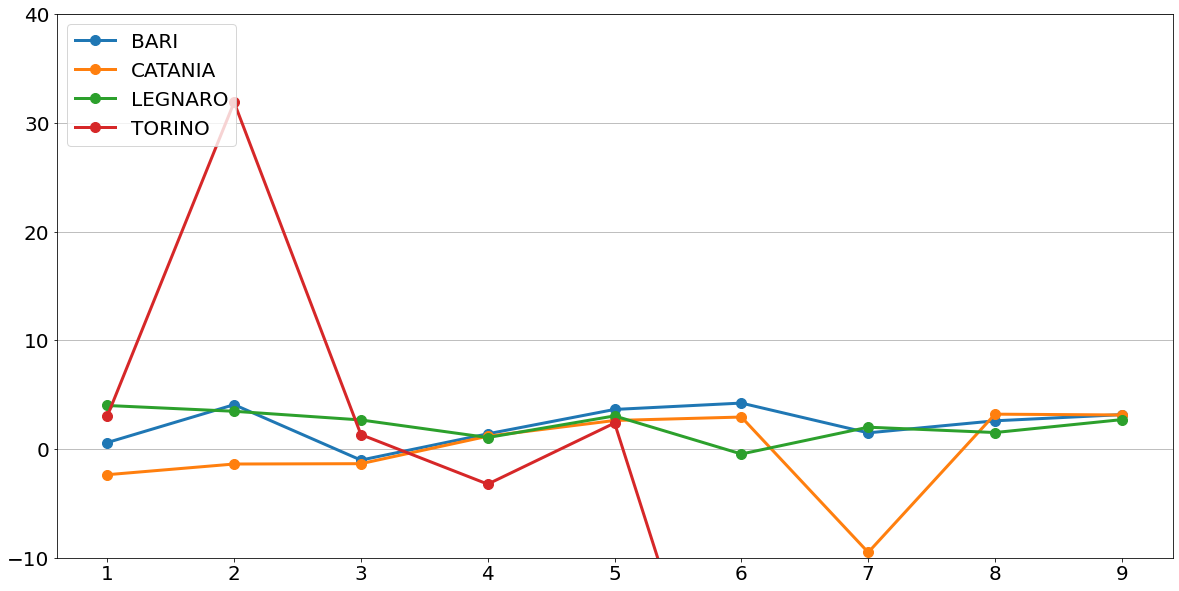

In [6]:
plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(-10, 40)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

In [7]:
df_ratio = df_ratio.drop(['TORINO'], axis=1)

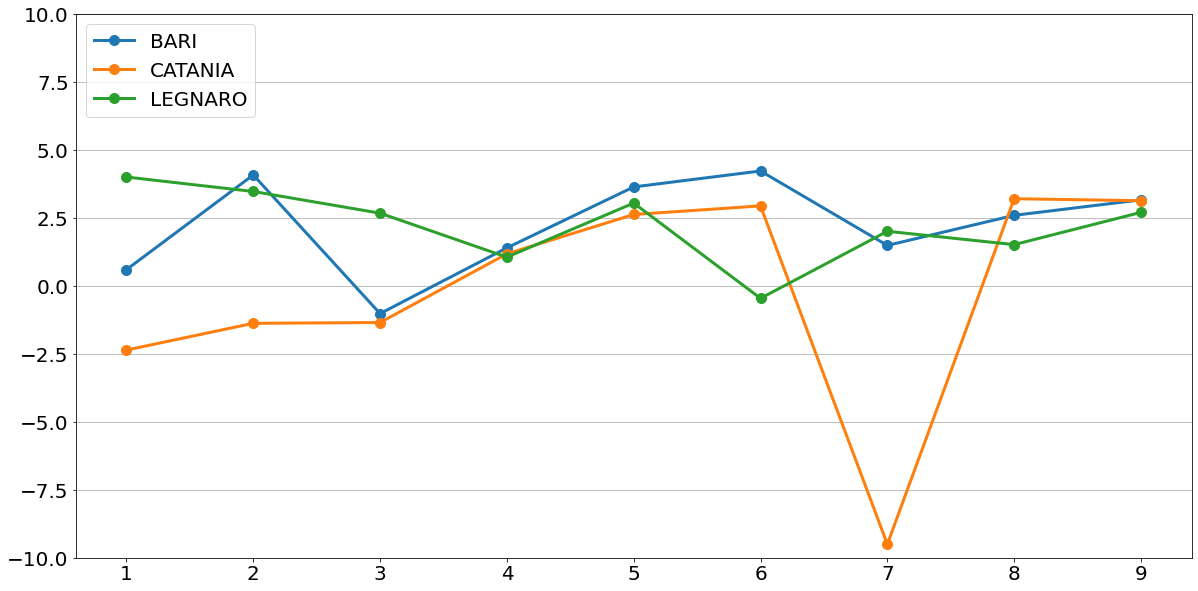

In [8]:
plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(-10, 10)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

### Cputime

In [10]:
metric = "jobResUsageSum_time_cpu"

# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
cput_monalisa = {}
cput_egi = {}
cput_ratio = {}

for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    cput_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumcpu/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'cputime')
    cput_egi[m] = h.remap_egi(values_egi[m])
    cput_ratio[m] =dict((k, (1.0 - float(cput_monalisa[m][k]) / float(cput_egi[m][k])) * 100.) for k in cput_monalisa[m])
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'cputime', 'monalisa', cput_monalisa[m])
    h.write_influx(influx_url, m, year, 'cputime', 'egi', cput_egi[m])
    h.write_influx(influx_url, m, year, 'cputime', 'ratio', cput_ratio[m])

dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['

In [11]:
df_ratio = pd.DataFrame.from_dict(cput_ratio, dtype=float, orient='index')    
print (df_ratio)

        CNAF       BARI    CATANIA    LEGNARO        TORINO       TRIESTE
1  12.855794   9.373927   1.274136   9.566494  5.921291e+00  3.081263e+00
2  10.405669  10.909521   3.667246   9.714714  4.038510e+00  5.196197e+00
3   9.157666  11.836895   8.763932   8.564935  5.968313e+00  6.606607e+00
4  10.277060  10.053843   7.723384   6.237372 -8.221020e-01  6.873224e+00
5   8.241278  11.494485   9.301670  12.286160  4.368276e+00  1.561926e+01
6  21.169998  17.045698  16.861959  20.611995 -1.789587e+01  2.331137e+01
7  20.697757  12.945871  -2.302860  13.968695 -2.549000e+07 -1.622990e+07
8  14.105794  11.505811   9.023753   8.928603 -7.988990e+07 -2.643990e+07
9  12.739532  11.429247  10.152041  11.911652 -1.020999e+08 -2.548990e+07


In [12]:
df_ratio = df_ratio.drop(['CNAF','TRIESTE'], axis=1)

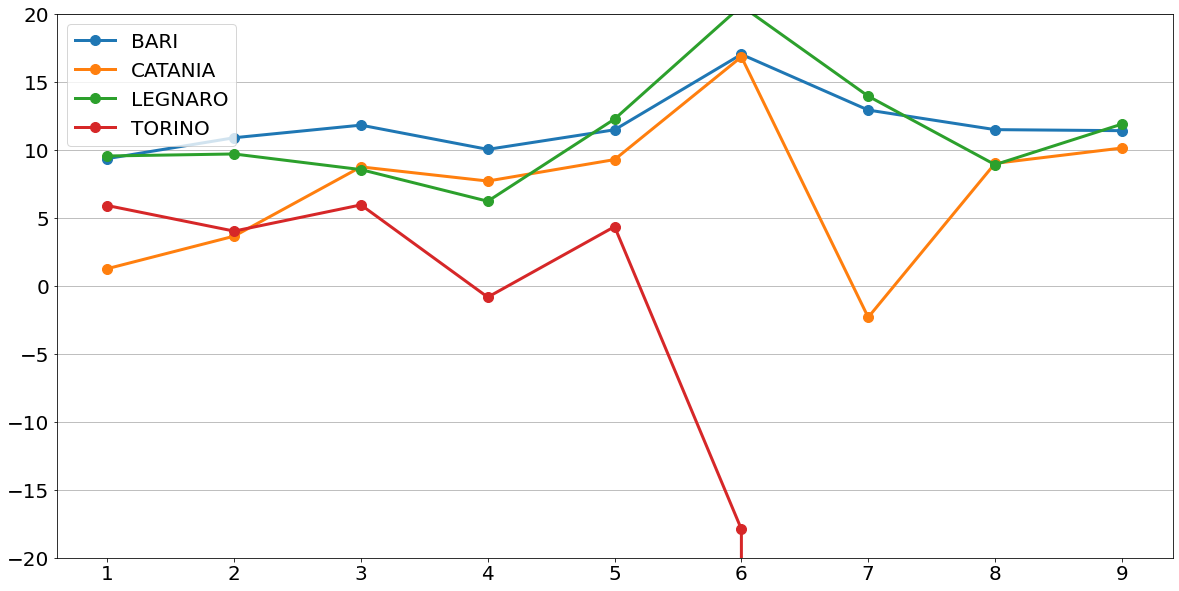

In [13]:
plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(-20, 20)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

In [14]:
df_ratio = df_ratio.drop(['TORINO'], axis=1)

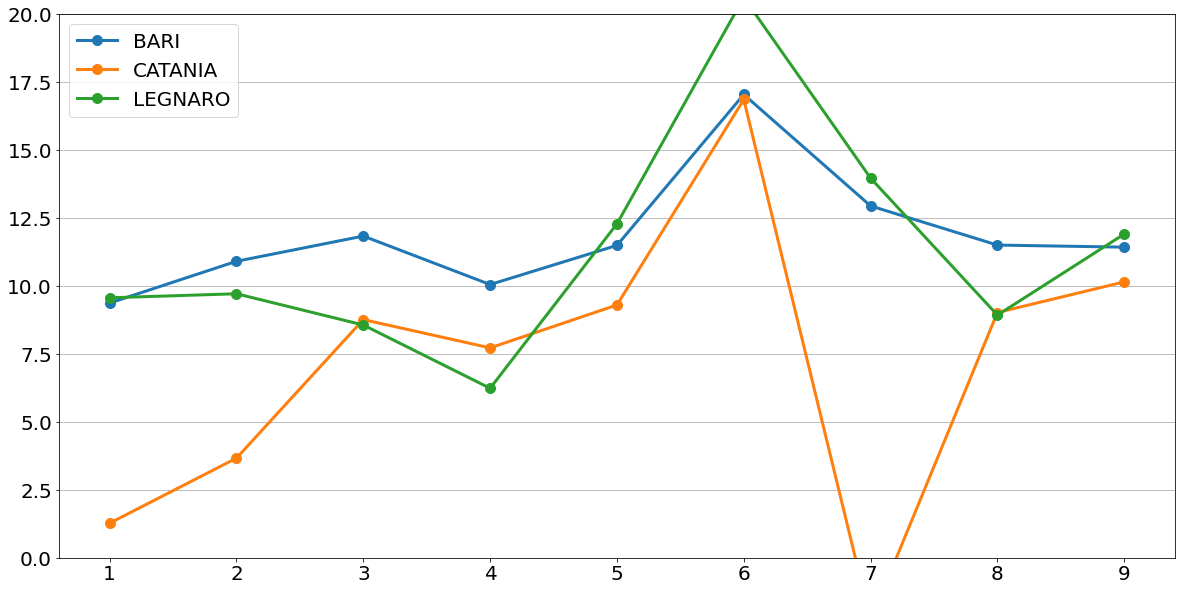

In [15]:
plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(0, 20)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

## Monalisa cumulative walltime/cputime per year
Evaluate walltime and cputime accumulated each year from the beginning of the year up to the current month.

### Walltime

In [16]:
import helpers as h
import pandas as pd

year= 2021
month = 5
values = {}
time = {}
metric = "jobResUsageSum_time_run"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

dict_keys(['Bari', 'Catania', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])


In [17]:
dataframe = pd.DataFrame.from_dict(time,  orient='index').astype(int)
# Exclude CNAF
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print (dataframe)

         BARI  CATANIA  LEGNARO   TORINO
2014  2627454  2157047  3102386  2668350
2015  2984178  3631703  5846800  3489004
2016  8138754  5595842  5253637  3985476
2017  6118273  4705078  6047207  4192919
2018  5932277  5641358  4789435  2983572
2019  8853916  5611895  6924049  5906900
2020  7301157  2630111  7631591  5455245
2021  9951436  5817262  7691823  6173372


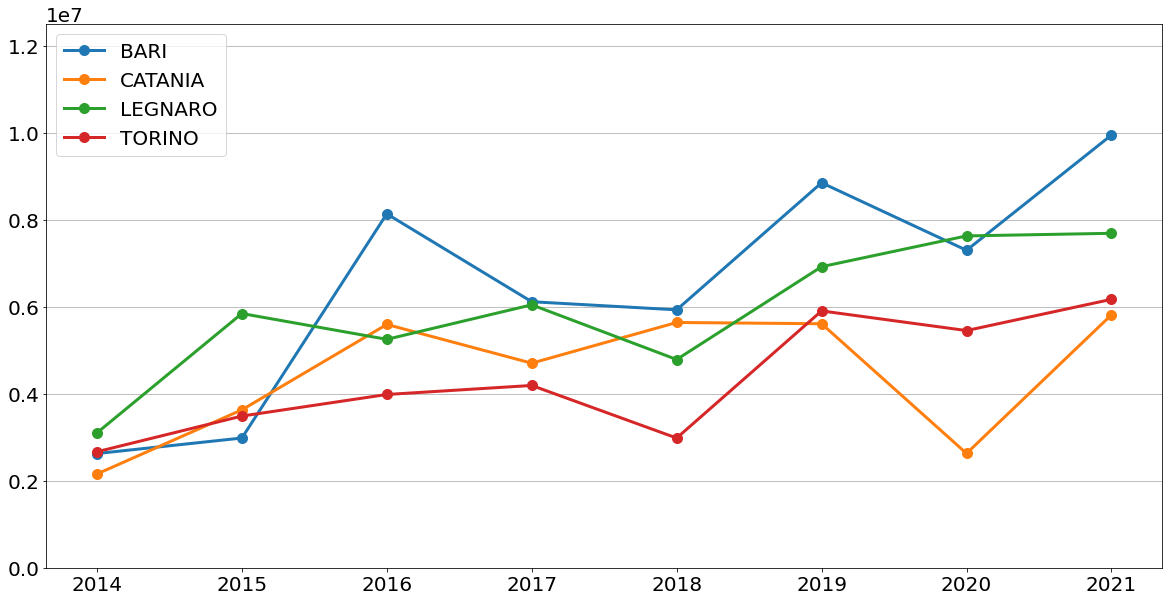

In [18]:
plot = dataframe.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot.set_ylim(0, 12500000)
plot.yaxis.get_offset_text().set_fontsize(20)
plot.grid(True, axis='y')
plot.legend(loc=2, prop={'size':20})

### Cputime

In [19]:
metric = "jobResUsageSum_time_cpu"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

dict_keys(['Bari', 'Catania', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])


In [20]:
dataframe = pd.DataFrame.from_dict(time, orient='index').astype(int)
# Exclude CNAF
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print (dataframe)

         BARI  CATANIA  LEGNARO   TORINO
2014  2169000  1296500  2330000  2020000
2015  2584000  2732800  4949000  2956000
2016  7088000  4390700  4163999  3068000
2017  5253000  3356600  4950000  3227000
2018  4980000  4021600  3786000  2166000
2019  7521000  4251600  5732000  3099000
2020  5857000  1955900  5836000  2337000
2021  6658000  4405600  5469000  4228909


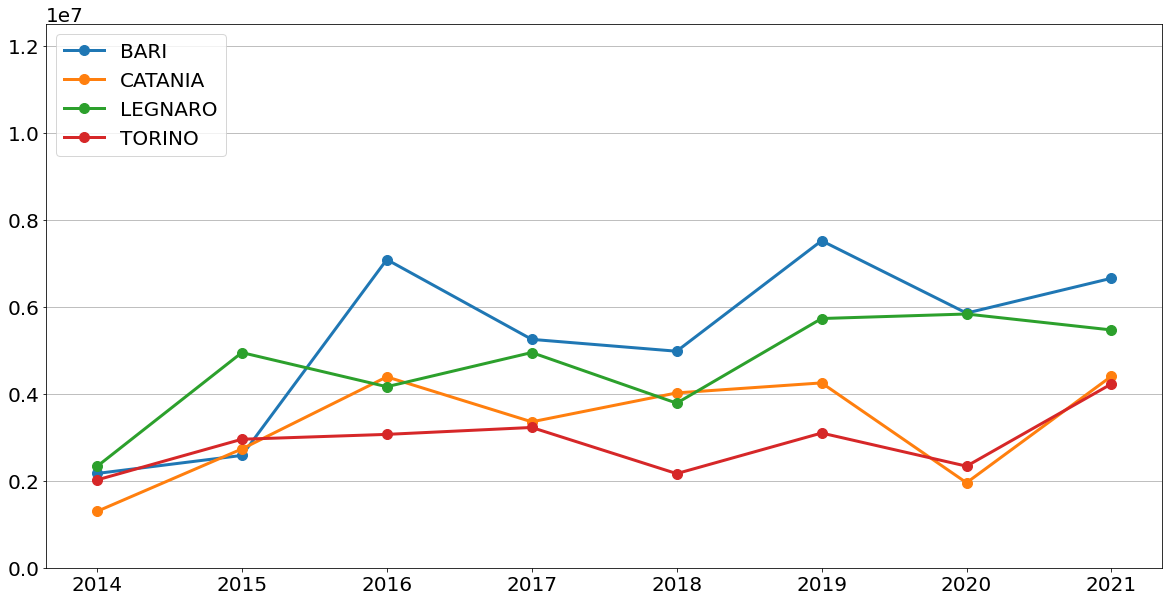

In [21]:
plot = dataframe.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot.set_ylim(0, 12500000)
plot.yaxis.get_offset_text().set_fontsize(20)
plot.grid(True, axis='y')
plot.legend(loc=2, prop={'size':20})